In [50]:
import pandas as pd
import json

stats = {
    'MY': {},
    'SG': {},
    'UK': {}
}

df = pd.read_csv('data/adhoc_2022-12-16_benchmark.csv')\
    .sort_values(by=['country','size'], ascending=False)\
        .reset_index(drop=True)
for c in df.country.unique():
    stats[c]['mean'] = df[df.country == c]['size'].mean()
    stats[c]['min'] = df[df.country == c]['size'].min()
    stats[c]['max'] = df[df.country == c]['size'].max()
    stats[c]['max_min'] = stats[c]['max'] / stats[c]['min']
    stats[c]['stdev'] = df[df.country == c]['size'].std()
    stats[c]['stdev_perc'] = stats[c]['stdev'] / stats[c]['mean'] * 100

print(json.dumps(stats, sort_keys=True, indent=4))

{
    "MY": {
        "max": 303430.0,
        "max_min": 10.725698126546483,
        "mean": 95376.74774774775,
        "min": 28290.0,
        "stdev": 45402.801971953304,
        "stdev_perc": 47.60363824947623
    },
    "SG": {
        "max": 37052.2,
        "max_min": 1.8778673153920225,
        "mean": 28510.05376344086,
        "min": 19731.0,
        "stdev": 3340.035415770289,
        "stdev_perc": 11.715289783330041
    },
    "UK": {
        "max": 109246.0,
        "max_min": 5.127957191137814,
        "mean": 71631.46461538461,
        "min": 21304.0,
        "stdev": 8831.221150920499,
        "stdev_perc": 12.328689910695722
    }
}


Text(0.3, 0, '\ncharts: @thevesh on Twitter')

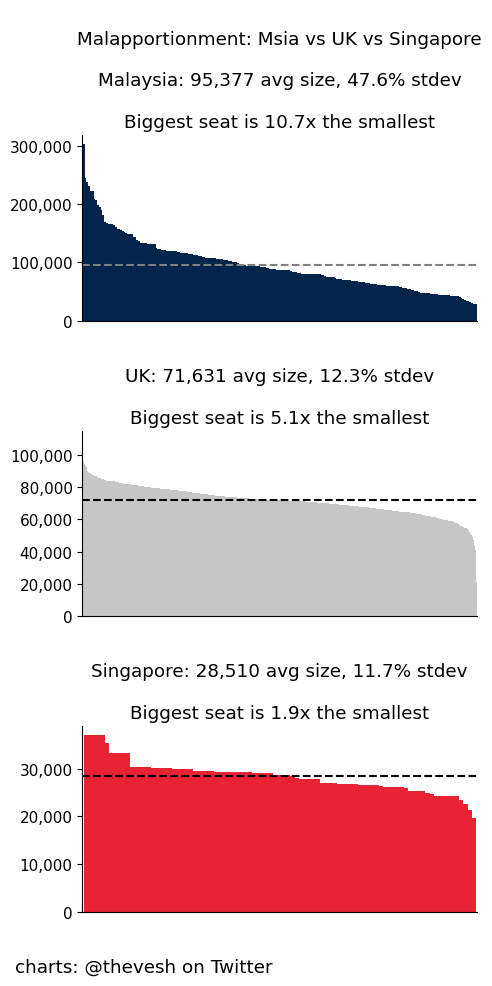

In [81]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.ticker as tkr

n_countries = len(df.country.unique())
country = {0: 'MY', 1: 'UK', 2: 'SG'}
country_name = {0: 'Malaysia', 1: 'UK', 2: 'Singapore'}
country_colour = {0: '#03254c', 1: '#c6c6c6', 2: '#e72334'}
line_colour = {0: 'grey', 1: 'black', 2: 'black'}

plt.rcParams.update({'font.size': 11,
                     'font.family': 'sans-serif',
                     'grid.linestyle': 'dashed'})
plt.rcParams["figure.figsize"] = [5,10]
plt.rcParams["figure.autolayout"] = True
fig, ax = plt.subplots(n_countries, 1)

axes = ax.ravel()

for i in range(n_countries):
    c = country[i]
    df[df.country == c].plot(kind='bar', width=1, y='size', edgecolor='black', lw=0, 
    ax=axes[i], color=country_colour[i], legend=False)
    title0 = f'\nMalapportionment: Msia vs UK vs Singapore\n' if i == 0 else f''
    title1 = f"{country_name[i]}: {stats[c]['mean']:,.0f} avg size, {stats[c]['stdev_perc']:,.1f}% stdev"
    title2 = f"Biggest seat is {stats[c]['max_min']:,.1f}x the smallest"
    axes[i].set_title(f"{title0}\n{title1}\n\n{title2}")
    axes[i].axhline(stats[c]['mean'], linestyle='--', c=line_colour[i])
    axes[i].spines['top'].set_visible(False)
    axes[i].spines['right'].set_visible(False)
    axes[i].get_yaxis().set_major_formatter(tkr.FuncFormatter(lambda x, p: format(int(x), ',')))
    axes[i].set_ylabel('')
    axes[i].axes.get_xaxis().set_visible(False)
    axes[i].set_axisbelow(True)
plt.suptitle(f'\ncharts: @thevesh on Twitter', y=0, x=0.3)